<h1 style="color:#1f77b4; text-align:left; font-size:40px;">
    Modeling
</h1>

<h3 style="color:#555; text-align:left;">
    Algorithms, Train and Validation, hyperparametrization and model comparison
</h3>


<h2 style="color:#1f77b4; border-bottom: 3px solid #1f77b4; padding-bottom:4px;">
</h2>

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))


In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from src.utils_data import save_df

DATA_DIR = os.path.join("..", "data")
CLEAN_PATH = os.path.join(DATA_DIR, "interim", "telco_master_clean.csv")


In [3]:
df = pd.read_csv(CLEAN_PATH)
print("Shape do dataset limpo:", df.shape)
df.head()


Shape do dataset limpo: (7043, 39)


,demo_gender,demo_age,demo_under_30,demo_senior_citizen,demo_married,demo_dependents,loc_zip_code,svc_referred_a_friend,svc_number_of_referrals,svc_tenure_in_months,...,svc_total_extra_data_charges,svc_total_revenue,st_satisfaction_score,st_customer_status,st_churn_value,st_cltv,st_churn_category,st_churn_reason,zipcode_population,demo_has_dependents
0,Male,78,0,1,0,0,90022,0,0,1,...,20,59.65,3,Churned,1,5433,Competitor,Competitor offered more data,68701,0
1,Female,74,0,1,1,1,90063,1,1,8,...,0,1024.10,3,Churned,1,5302,Competitor,Competitor made better offer,55668,1
2,Male,71,0,1,0,1,90065,0,0,18,...,0,1910.88,2,Churned,1,3179,Competitor,Competitor made better offer,47534,1
3,Female,78,0,1,1,1,90303,1,1,25,...,0,2995.07,2,Churned,1,5337,Dissatisfaction,Limited range of services,27778,1
4,Female,80,0,1,1,1,90602,1,1,37,...,0,3102.36,2,Churned,1,2793,Price,Extra data charges,26265,1


# 1: Model Selection

# 2: Train and Validation

In [4]:
# Identify target column
target_col = "st_churn_value"   # correct column name

# Split features and target
X = df.drop(columns=[target_col])
y = df[target_col]

print("X shape:", X.shape)
print("y distribution:")
print(y.value_counts(normalize=True))


X shape: (7043, 38)
y distribution:
st_churn_value
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # garante a mesma proporção de churn em ambos
)


In [6]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

from src.utils_data import save_df
save_df(train_df, "train_df", folder="processed")
save_df(test_df, "test_df", folder="processed")

print("✅ Ficheiros guardados em data/processed/")


✅ Guardado: /Users/pedroazevedo/Documents/GitHub/EnterpriseDataScienceBootcamp_workgroup/data/processed/train_df.csv
✅ Guardado: /Users/pedroazevedo/Documents/GitHub/EnterpriseDataScienceBootcamp_workgroup/data/processed/test_df.csv
✅ Ficheiros guardados em data/processed/


In [7]:
for name, part in [("Train", train_df), ("Test", test_df)]:
    print(f"\n{name} set:")
    print(part["st_churn_value"].value_counts(normalize=True))



Train set:
st_churn_value
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Test set:
st_churn_value
0    0.734564
1    0.265436
Name: proportion, dtype: float64


# 3: Hyperparameters

# 4: Model Comparison

In [8]:

# --- Imports ---
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

from src.utils_data import load_df

# --- Caminhos ---
DATA_DIR = os.path.join("..", "data", "processed")


In [9]:
# 1️⃣ Carregar datasets
# ============================================================

train_df = load_df("train_df", folder="processed")
test_df = load_df("test_df", folder="processed")

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

📂 Carregado: /Users/pedroazevedo/Documents/GitHub/EnterpriseDataScienceBootcamp_workgroup/data/processed/train_df.csv
📂 Carregado: /Users/pedroazevedo/Documents/GitHub/EnterpriseDataScienceBootcamp_workgroup/data/processed/test_df.csv
Train shape: (5634, 39)
Test shape: (1409, 39)


<!-- MODELO: Secção principal numerada -->
<!-- 
<h2 style="background-color:#1f77b4; color:white; padding:10px; border-radius:6px;">
    X. Nome da Secção
</h2>
-->

<!-- MODELO: Secção com linha colorida -->
<!-- 
<h2 style="color:#ff7f0e; border-bottom: 3px solid #ff7f0e; padding-bottom:4px;">
    X. Nome da Secção
</h2>
-->

<!-- MODELO: Subsecção -->
<!-- 
<h3 style="color:#2ca02c; margin-top:10px;">
    X.Y Nome da Subsecção
</h3>
-->

<!-- MODELO: Caixa de Nota -->
<!-- 
<div style="border-left: 5px solid #1f77b4; padding:10px; background-color:#f5f9ff; margin:15px 0;">
    <b>Nota:</b> Texto da nota.
</div>
-->

In [10]:
#2️⃣ Separar features (X) e target (y)
# ============================================================

target_col = "st_churn_value"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

In [11]:
# 3️⃣ Remover identificadores e colunas com leakage
# ============================================================

cols_to_remove = []

# Remover identificadores únicos
for col in X_train.columns:
    if "id" in col.lower():
        cols_to_remove.append(col)

# Remover colunas ligadas ao churn/status
for col in X_train.columns:
    if "churn" in col.lower() or "status" in col.lower():
        cols_to_remove.append(col)

cols_to_remove = list(set(cols_to_remove))  # remover duplicados

print(f"🔍 Colunas removidas por potencial leakage: {cols_to_remove}")

X_train = X_train.drop(columns=cols_to_remove, errors="ignore")
X_test = X_test.drop(columns=cols_to_remove, errors="ignore")

🔍 Colunas removidas por potencial leakage: ['st_customer_status', 'st_churn_category', 'st_churn_reason']


In [12]:
# 4️⃣ Encoding automático + scaling
# ============================================================

cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns

print(f"Categóricas: {len(cat_cols)} | Numéricas: {len(num_cols)}")

# One-hot encoding
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Alinhar colunas entre treino e teste
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Normalizar apenas variáveis numéricas originais
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


Categóricas: 5 | Numéricas: 30



🔹 Treinando Logistic Regression...
Accuracy: 0.965 | F1: 0.931 | AUC: 0.992

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1035
           1       0.96      0.91      0.93       374

    accuracy                           0.96      1409
   macro avg       0.96      0.95      0.95      1409
weighted avg       0.96      0.96      0.96      1409



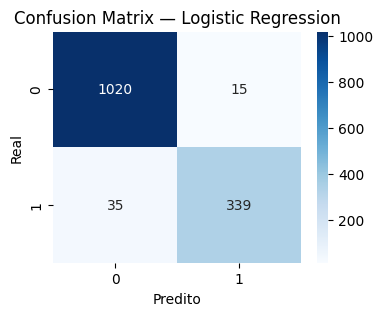


🔹 Treinando Random Forest...
Accuracy: 0.957 | F1: 0.915 | AUC: 0.986

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1035
           1       0.97      0.86      0.92       374

    accuracy                           0.96      1409
   macro avg       0.96      0.93      0.94      1409
weighted avg       0.96      0.96      0.96      1409



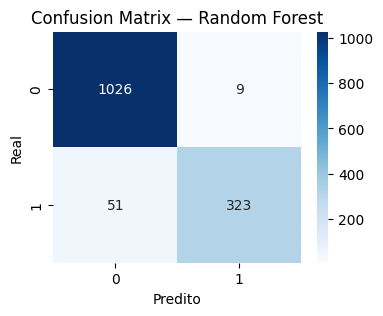

In [13]:
# 5️⃣ Treinar modelos
# ============================================================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
}

results = []

for name, model in models.items():
    print(f"\n🔹 Treinando {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy: {acc:.3f} | F1: {f1:.3f} | AUC: {auc:.3f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-score": f1,
        "ROC-AUC": auc
    })

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()


📊 Comparativo de modelos:


,Model,Accuracy,F1-score,ROC-AUC
0,Logistic Regression,0.964514,0.931319,0.992082
1,Random Forest,0.957417,0.915014,0.986265


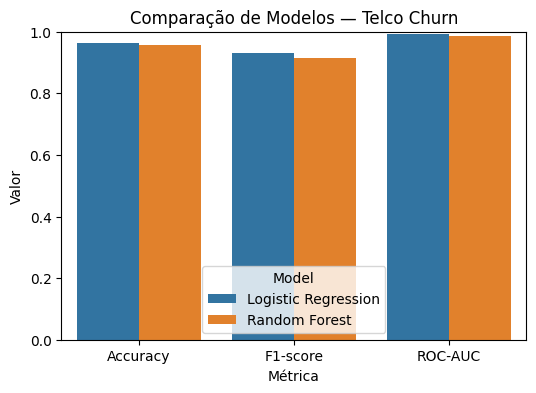

In [14]:
# 6️⃣ Comparar resultados
# ============================================================

results_df = pd.DataFrame(results).sort_values("ROC-AUC", ascending=False)
print("\n📊 Comparativo de modelos:")
display(results_df)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=results_df.melt(id_vars="Model", var_name="Métrica", value_name="Valor"),
    x="Métrica", y="Valor", hue="Model"
)
plt.title("Comparação de Modelos — Telco Churn")
plt.ylim(0, 1)
plt.show()

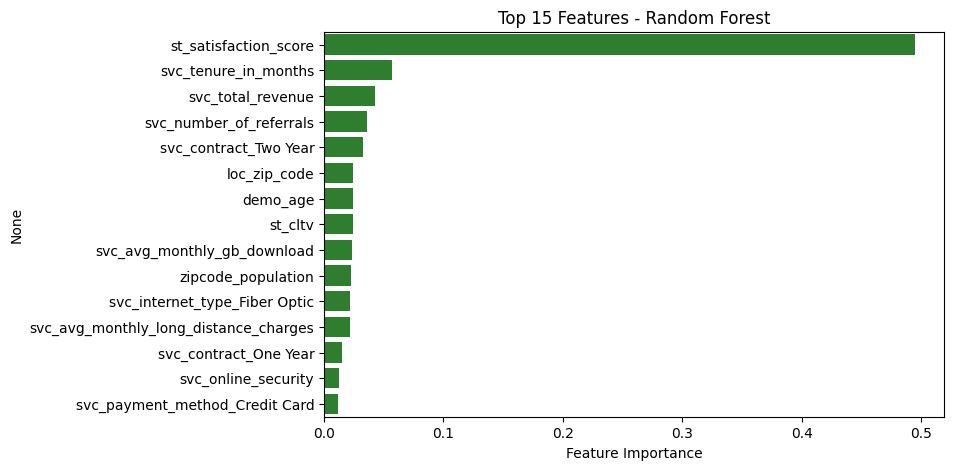

In [15]:
# 7️⃣ Importância de Features (Random Forest)
# ============================================================

rf = models["Random Forest"]
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index, color="forestgreen")
plt.title("Top 15 Features - Random Forest")
plt.xlabel("Feature Importance")
plt.show()

In [16]:
# 8️⃣ Guardar resultados
# ============================================================

results_df.to_csv(os.path.join(DATA_DIR, "model_results.csv"), index=False)
print("\n✅ Resultados guardados em data/processed/model_results.csv")


✅ Resultados guardados em data/processed/model_results.csv


<!-- MODELO: Secção principal numerada -->
<!-- 
<h2 style="background-color:#1f77b4; color:white; padding:10px; border-radius:6px;">
    X. Nome da Secção
</h2>
-->

<!-- MODELO: Secção com linha colorida -->
<!-- 
<h2 style="color:#ff7f0e; border-bottom: 3px solid #ff7f0e; padding-bottom:4px;">
    X. Nome da Secção
</h2>
-->

<!-- MODELO: Subsecção -->
<!-- 
<h3 style="color:#2ca02c; margin-top:10px;">
    X.Y Nome da Subsecção
</h3>
-->

<!-- MODELO: Caixa de Nota -->
<!-- 
<div style="border-left: 5px solid #1f77b4; padding:10px; background-color:#f5f9ff; margin:15px 0;">
    <b>Nota:</b> Texto da nota.
</div>
-->